In [1]:
from EMDA import EMDA, __version__
print("EMDA version is:", __version__)

from numpy import average

import matplotlib.pyplot as plt

plt.style.use('ggplot')

/Users/mikicanyelles/miniconda3/envs/emda-dev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EMDA version is: 0.2.0a3


# Load parameters and trajectory <a class="anchor" id="load"></a>

In [2]:
parameters = 'parameters.prmtop' # AMBER parameters file
trajectory = 'trajectory.nc'     # AMBER NetCDF coordinates (10 frames)

In [27]:
emda2 = EMDA(parameters=parameters, trajectory=trajectory)

Trajectory has been loaded!


# Select the atoms to be used for the analysis <a class="anchor" id="select"></a>

In [4]:
emda.select('C10', 'C10', sel_type='at_name')
emda.select('C11', 'C11', sel_type='at_name')
emda.select('C12', 'C12', sel_type='at_name')
emda.select('C13', 'C13', sel_type='at_name')
emda.select('C14', 'C14', sel_type='at_name')

emda.select('H12', ['H12A', 'H12B'], sel_type='at_name')
emda.select('cof', 10597, sel_type='at_num')

emda.select('COO', [10599, 10600, 10601], sel_type='at_num')

subs = emda.universe.select_atoms('resid 666')

In [5]:
print(emda.selections['C12'])

<AtomGroup [<Atom 10626: C12 of type c3 of resname DHA, resid 666 and segid SYSTEM>]>


# Analysis of the trajectory <a class="anchor" id="trajanalysis"></a>

In [6]:
emda.add_distance('dist_H12', 'cof', 'H12')
emda.add_angle('angle_C11C12C13', 'C11', 'C12', 'C13')
emda.add_dihedral('dihe_C10C11C13C14', 'C10', 'C11', 'C13', 'C14', domain=180)
emda.add_contacts('contacts_COO', 'COO', sel_env=5, interactions='all', include_WAT=True, measure_distances=True)
emda.add_contacts('contacts_prot', 'protein', sel_env=5)
#emda.add_pKa('pka', excluded_ions=['Na+'], keep_pdb=True, keep_pka=True)
emda.add_RMSD('RMSD_subs', subs)

## Run the measurements

In [7]:
print(emda.measures)

{'dist_H12': Measure dataclass with:
	Name:   dist_H12
	Type:   distance
	Sel:    [<AtomGroup with 1 atom>, <AtomGroup with 2 atoms>]
	Status: Not calculated
, 'angle_C11C12C13': Measure dataclass with:
	Name:   angle_C11C12C13
	Type:   angle
	Sel:    [<AtomGroup with 1 atom>, <AtomGroup with 1 atom>, <AtomGroup with 1 atom>]
	Status: Not calculated
, 'dihe_C10C11C13C14': Measure dataclass with:
	Name:   dihe_C10C11C13C14
	Type:   dihedral
	Sel:    [<AtomGroup with 1 atom>, <AtomGroup with 1 atom>, <AtomGroup with 1 atom>, <AtomGroup with 1 atom>]
	Status: Not calculated
, 'contacts_COO': Measure dataclass with:
	Name:   contacts_COO
	Type:   contacts
	Sel:    [<AtomGroup with 3 atoms>, <AtomGroup with 77 atoms, with selection 'around 5 group select' on the entire Universe.>]
	Status: Not calculated
, 'contacts_prot': Measure dataclass with:
	Name:   contacts_prot
	Type:   contacts
	Sel:    [<AtomGroup with 10510 atoms>, 5]
	Status: Not calculated
, 'RMSD_subs': Measure dataclass with:

In [28]:
?emda.run

Signature:
emda.run(
    exclude=None,
    run_only=None,
    recalculate=False,
    step=1,
    start=1,
    end=-1,
)
Docstring:
DESCRIPTION:
    Run all the measurements configured in self.measures

OPTIONS:
    - exclude:      skip measures with the given name. Ignored if used with run_only.
    - run_only:     run only the measures passed by list of names. If used with exclude, exclude will be ignored.
    - recalculate:  [True | False | (List | str)] True for resetting all precalculated measures, list or str with
                    the specific measures to recalculate.
    - step:         Frames to jump during the analysis. Default is 1, so all the trajectory will be analysed.
    - start:        First frame to start the analysis. Default is 0.
    - end:          Last frame to analyse (included). Default is last frame of trajectory.
File:      ~/miniconda3/envs/emda-dev/lib/python3.12/site-packages/EMDA/emda.py
Type:      method

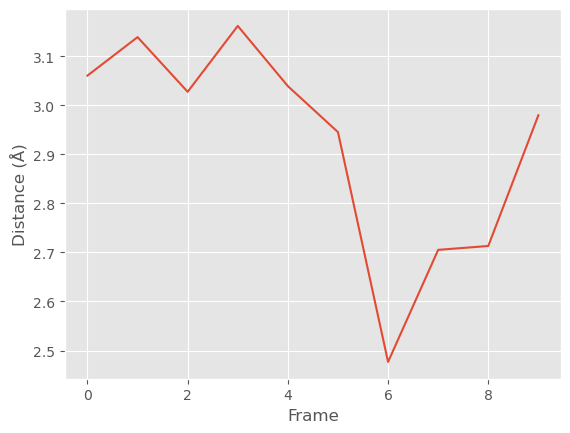

In [9]:
emda.measures['dist_H12'].plot()

## Analyse distances, angles and dihedrals

In [10]:
emda.analyse_value('dist_H12_bool', 'dist_H12', 5)

In [11]:
print('angle_C11C12C13 average is:', average(emda.measures['angle_C11C12C13'].result))
print('angle_C11C12C13 min is:', min(emda.measures['angle_C11C12C13'].result))
print('angle_C11C12C13 max is:', max(emda.measures['angle_C11C12C13'].result))

angle_C11C12C13 average is: 112.20870900390655
angle_C11C12C13 min is: 107.89308253365704
angle_C11C12C13 max is: 118.05900472297759


In [12]:
emda.analyse_value('angle_C11C12C13_bool', 'angle_C11C12C13', 110, 5, mode='tol')

In [13]:
emda.analyses

{'dist_H12_bool': Analysis dataclass with:
 	Name:   dist_H12_bool
 	Type:   value
 	Related mesure:    dist_H12
 	Status: Calculated,
 'angle_C11C12C13_bool': Analysis dataclass with:
 	Name:   angle_C11C12C13_bool
 	Type:   value
 	Related mesure:    angle_C11C12C13
 	Status: Calculated}

In [14]:
emda.analyse_NACs('dist_angle_NACs', ['dist_H12_bool', 'angle_C11C12C13_bool'], inverse=False)


In [15]:
print('dist_H12_bool:\t\t\t', emda.analyses['dist_H12_bool'].result)
print('angle_C11C12C13_bool:\t\t', emda.analyses['angle_C11C12C13_bool'].result)
print('dist_angle_NACs:\t\t', emda.analyses['dist_angle_NACs'].result)

dist_H12_bool:			 [True, True, True, True, True, True, True, True, True, True]
angle_C11C12C13_bool:		 [True, True, True, True, True, False, True, True, False, True]
dist_angle_NACs:		 [True, True, True, True, True, False, True, True, False, True]


## Analyse contacts

In [16]:
emda.analyse_contacts_frequency('contacts_COO_freq', 'contacts_COO')
emda.analyse_contacts_frequency('contacts_COO_freq_perc', 'contacts_COO', percentage=True)

In [17]:
print(emda.analyses['contacts_COO_freq'].result)
print(emda.analyses['contacts_COO_freq_perc'].result)

{'PHE174': 10, 'LEU178': 10, 'ARG402': 10, 'GLN406': 10, 'LEU407': 1, 'WAT1926': 10, 'WAT2448': 3, 'WAT2882': 2, 'WAT4132': 10, 'WAT6949': 3, 'WAT9053': 3, 'WAT10696': 8, 'WAT13753': 10, 'WAT13796': 7, 'WAT20116': 5, 'WAT20580': 10, 'WAT21098': 1, 'WAT21107': 10, 'WAT22202': 8, 'WAT10954': 2, 'WAT18329': 7, 'WAT20907': 3, 'WAT7078': 2, 'WAT21978': 6, 'WAT14657': 6, 'WAT1514': 1, 'WAT3156': 4, 'WAT5929': 2, 'WAT12490': 2}
{'PHE174': 100.0, 'LEU178': 100.0, 'ARG402': 100.0, 'GLN406': 100.0, 'LEU407': 10.0, 'WAT1926': 100.0, 'WAT2448': 30.0, 'WAT2882': 20.0, 'WAT4132': 100.0, 'WAT6949': 30.0, 'WAT9053': 30.0, 'WAT10696': 80.0, 'WAT13753': 100.0, 'WAT13796': 70.0, 'WAT20116': 50.0, 'WAT20580': 100.0, 'WAT21098': 10.0, 'WAT21107': 100.0, 'WAT22202': 80.0, 'WAT10954': 20.0, 'WAT18329': 70.0, 'WAT20907': 30.0, 'WAT7078': 20.0, 'WAT21978': 60.0, 'WAT14657': 60.0, 'WAT1514': 10.0, 'WAT3156': 40.0, 'WAT5929': 20.0, 'WAT12490': 20.0}


In [18]:
emda.analyse_contacts_amount('contacts_COO_amount', 'contacts_COO')

In [19]:
print(emda.analyses['contacts_COO_amount'].result)

[19, 17, 19, 15, 15, 17, 19, 14, 15, 16]


In [20]:
emda.analyse_contacts_frequency('contacts_prot_freq', 'contacts_prot')
emda.analyse_contacts_amount('contacts_prot_amount', 'contacts_prot')

In [21]:
print(emda.analyses['contacts_prot_freq'].result)
print(emda.analyses['contacts_prot_amount'].result)

{'MET1': {'VAL53': 10, 'ARG3': 10, 'PRO86': 10, 'GLU55': 10, 'TYR4': 9, 'ASP56': 10, 'GLY2': 10, 'ALA54': 10, 'LEU57': 7}, 'GLY2': {'ASP52': 10, 'VAL53': 10, 'ARG3': 10, 'PRO86': 10, 'GLU55': 2, 'TYR4': 10, 'GLY85': 2, 'HID51': 8, 'ALA54': 10}, 'ARG3': {'ASP52': 10, 'ARG5': 10, 'VAL53': 10, 'ASP50': 10, 'GLN84': 10, 'PRO86': 10, 'MET1': 10, 'TYR4': 10, 'HID51': 10, 'GLY85': 10, 'GLY87': 5}, 'TYR4': {'VAL83': 10, 'ASP50': 10, 'PRO86': 10, 'GLY85': 10, 'CYS89': 1, 'GLY58': 5, 'LEU26': 10, 'ARG5': 10, 'GLU55': 9, 'MET1': 9, 'ASP52': 10, 'LEU60': 10, 'ILE6': 10, 'GLN84': 10, 'PHE49': 10, 'GLY2': 10, 'LEU57': 10, 'VAL53': 10, 'VAL92': 8, 'ASP56': 8, 'HID51': 10, 'LEU35': 10}, 'ARG5': {'VAL83': 10, 'GLU48': 7, 'ILE6': 10, 'ARG3': 10, 'ASP50': 10, 'THR82': 10, 'PHE49': 10, 'ARG7': 10, 'GLN84': 10, 'GLY85': 10, 'HID51': 10}, 'ILE6': {'LEU39': 10, 'VAL83': 10, 'GLU47': 10, 'GLU48': 10, 'ASP50': 10, 'THR82': 10, 'GLN84': 10, 'ARG7': 10, 'PHE49': 10, 'TYR4': 10, 'HID51': 10, 'LEU24': 10, 'VAL8': 

In [23]:
from EMDA import ext_plot_contacts_frequencies_differences

In [25]:
ext_plot_contacts_frequencies_differences(emda.analyses['contacts_prot_freq'].result[:5], emda.analyses['contacts_prot_freq'][5:])

KeyError: slice(None, 5, None)